## 인스타그램 : 가장 뜨는 제주도 핫플레이스는 어디일까?

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import time

In [3]:
service = Service('chromedriver.exe')
driver = webdriver.Chrome(service = service)

In [4]:
# 인스타그램 접속하기
html = 'https://www.instagram.com/'
driver.get(html)
time.sleep(2)

In [ ]:
# 인스타그램 로그인하기

### 검색 결과 URL을 만들어 접속하기

In [5]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/'+word
    return url

In [92]:
url = insta_searching('제주도맛집')
driver.get(url)
time.sleep(5)

### 첫 번째 게시글 열기

In [ ]:
# 교재 옛날 방식
def select_first(driver):
    first = driver.find_element_by_css_selector('div._9AhH0')
    fitst.click()
    time.sleep(3)
select_first(driver)

In [95]:
from selenium.webdriver.common.by import By
def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(3)
select_first(driver)

### 게시글 정보 가져오기

In [32]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
content = soup.select('div.C4VMK span')[1].text
content = unicodedata.normalize('NFC', content) # MAC 사용 시 글 깨짐.
content

'.❤제주 인스타 감성스팟!❤제주에서 요기가서 막찍어도인생샷을 건질수있다는곳들을모아봤어!! 여기가서 한번 찰칵 해보고 인스타에 업로드 기기!!@찍어줄 친구소환!!!..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플'

In [63]:
#tags = re.findall(r'#\w+', content)
tags = re.findall(r'#[^\s#,\\]+', content)
tags

['#제주맛집',
 '#제주도맛집',
 '#제주공항근처맛집',
 '#제주시맛집',
 '#애월맛집',
 '#중문맛집',
 '#제주공항맛집',
 '#서귀포맛집',
 '#산방산맛집',
 '#신제주맛집',
 '#제주시청맛집',
 '#제주애월맛집',
 '#월정리맛집',
 '#제주여행',
 '#제주핫플']

In [62]:
date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
date

'2022-01-16'

In [53]:
# 좋아요 수가 없는 것이 있기 때문에 pass
like = soup.select('a.zV_Nj > span')[0].text
like

''

In [55]:
place = soup.select('div.M30cS')[0].text
place

[<div class="M30cS"><div></div><div class="JF9hh"></div></div>]

In [ ]:
import re # 정규식 모듈
from bs4 import BeautifulSoup
import unicodedata

In [67]:
def get_content(driver):
    # 현재 페이지의 HTML 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK span')[1].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '
    
    # 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content) # '#'뒤에 연속된 문자(공백,)
    
    # 작성일자
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    # 좋아요 수 
    try:
        like = soup.select('a.zV_Nj > span')[0].text
    except:
        like = '여러 명'
        
    # 위치정보 
    try:
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        plcae = ''
        
    # 수집한 정보 저장
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['.❤제주 인스타 감성스팟!❤제주에서 요기가서 막찍어도인생샷을 건질수있다는곳들을모아봤어!! 여기가서 한번 찰칵 해보고 인스타에 업로드 기기!!@찍어줄 친구소환!!!..#제주맛집 #제주도맛집 #제주공항근처맛집 #제주시맛집 #애월맛집 #중문맛집 #제주공항맛집 #서귀포맛집 #산방산맛집 #신제주맛집 #제주시청맛집 #제주애월맛집 #월정리맛집 #제주여행 #제주핫플',
 '2022-01-16',
 '여러 명',
 '',
 ['#제주맛집',
  '#제주도맛집',
  '#제주공항근처맛집',
  '#제주시맛집',
  '#애월맛집',
  '#중문맛집',
  '#제주공항맛집',
  '#서귀포맛집',
  '#산방산맛집',
  '#신제주맛집',
  '#제주시청맛집',
  '#제주애월맛집',
  '#월정리맛집',
  '#제주여행',
  '#제주핫플']]

### 다음 게시글 열기

In [86]:
def move_next(driver):
    #right = driver.find_element(By.CSS_SELECTOR, 'a.coreSpriteRightPaginatoinArrow')
    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)
move_next(driver)

### 여러 게시글 정보 수집

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import re

# 1. 크롬 브라우저 열기 및 로그인
service = Service('chromedriver.exe')
driver = webdriver.Chrome(service = service)

html = 'https://www.instagram.com/'
driver.get(html)
time.sleep(2)

# 로그인

In [103]:
# 2. 인스타그램 검색 페이지 URL 만들기
word = '제주도맛집'
url = insta_searching(word)

# 3. 검색 페이지 접속
driver.get(url)
time.sleep(5)

# 4. 첫 번째 게시글 열기
select_first(driver)

# 5. 비어있는 변수(result) 만들기
results = [ ]

# 6->7->8 여러 게시물 수집
target = 50  # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생 시(네트워크 문제 등의 이유로) 2초 대기 후
    # 다음 게시글로 넘어가도록 try, except 구문을 활용
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(5)
        move_next(driver)
        
print(results[:2])

[['#그날의기억방법 아기자기 귀여운 ‘세모 제주’동쪽 구좌읍 행원리에 주먹밥 테이크아웃점제주 재료들로 만든 음식이라서더 신선하고 맛있더라구요ㅎㅎㅎ외관도 너무 귀엽고 주먹밥도 귀여워서또 다시 생각나는 곳입니다☺️제주 여행에 출출할때 잠깐 들려서간단히 먹기 좋습니다!주말 잘 마무리하세요😌<제주 제주시 구좌읍 행원로 121>', '2022-01-16', '여러 명', '세모제주', ['#그날의기억방법']], ['#그날의기억방법효리네민박에서 신상 소품샵으로 ‘소길별하’애월에 생긴 요즘 핫하다는 공간!예전에 효리네민박 촬영지에서 지금은 제주를 포함해 해당 지역 자원을활용해서 나만의 제품으로 만드는 로컬 브랜드가 20여개 입점되어 판매해요😌고퀄리티의 소품들이 많아서 좋더라구요ㅎㅎ예약은 네이버를 통해서 가능하고입장료는 1인 8,000원이고 시간당 25명만입장 가능하다고 합니다ㅎㅎ앞으로 더 많은 것들이 생겨날 공간이라 더 기대됩니다☺️이번 주도 즐거운 한 주 보내세요!*1월은 예약 마감이고 2월 예약은 1월 20일 5시에 열린다고 합니다<제주 제주시 애월읍 소길남길 34-37>', '2022-01-16', '여러 명', '소길별하', ['#그날의기억방법효리네민박에서']]]


In [117]:
def insta_craling(word, n):
    # 2. 인스타그램 검색 페이지 URL 만들기
    url = insta_searching(word)

    # 3. 검색 페이지 접속
    driver.get(url)
    time.sleep(5)

    # 4. 첫 번째 게시글 열기
    select_first(driver)

    # 5. 비어있는 변수(result) 만들기
    results = [ ]

    # 6->7->8 여러 게시물 수집
    target = n # 크롤링할 게시글 수
    for i in range(target):
        # 게시글 수집에 오류 발생 시(네트워크 문제 등의 이유로) 2초 대기 후
        # 다음 게시글로 넘어가도록 try, except 구문을 활용
        try:
            data = get_content(driver)
            results.format(word).append(data)
            move_next(driver)
        except:
            time.sleep(5)
            move_next(driver)

In [118]:
words = ['제주도맛집','제주맛집','제주여행','제주관광']
for word in words:
    insta_craling(word,50)
    results_df = pd.DataFrame(results)
    results_df.columns = ['content','date','like','place','tags']
    results_df.head()
    results_df.to_excel('crawling_{}.xlsx'.format(word), index=False)

### 수집데이터 저장

In [105]:
import pandas as pd

In [109]:
results_df = pd.DataFrame(results)
results_df.columns = ['content','date','like','place','tags']
results_df.head()

,content,date,like,place,tags
0,#그날의기억방법 아기자기 귀여운 ‘세모 제주’동쪽 구좌읍 행원리에 주먹밥 테이크아웃...,2022-01-16,여러 명,세모제주,[#그날의기억방법]
1,#그날의기억방법효리네민박에서 신상 소품샵으로 ‘소길별하’애월에 생긴 요즘 핫하다는 ...,2022-01-16,여러 명,소길별하,[#그날의기억방법효리네민박에서]
2,"<광고>양이 푸짐해서 보기도 좋고 맛도좋은 #섭지코지한끼혼밥,혼술,친구,연인,가족 ...",2022-01-15,여러 명,,"[#섭지코지한끼혼밥, #제주맛집, #제주도맛집, #제주도여행, #제주여행, #섭지코..."
3,"(광고)밥묵자~! 김대희가 밥두그릇 순삭했다는 그 맛집!""색달식당""'갈치가 이렇게 ...",2022-01-16,여러 명,,"[#제주도맛집, #제주갈치조림, #마노르블랑, #서귀포호텔, #제주도여행]"
4,22.01.17.새해의 시간도 너무나도 빠르게 흘러가는것이 아쉽지만 봄이 가까워지는...,2022-01-17,여러 명,목스키친-Mokskitchen,"[#목스키친, #제주맛집, #서귀포해물라면, #제주도맛집, #서귀포맛집]"


In [114]:
results_df.to_excel('crawling_jejudoMatJip.xlsx', index=False)

### 여러 엑셀 파일의 중복을 제거한 후 통합 저장
- '제주맛집', '제주여행', '제주관광'이라는 검색어를 이용해 인스타그램 게시글 정보 수집하면\
    게시글이 중복으로 수집되는 경우가 발생하기 때문에 중복을 제거하는 과정 필요

In [124]:
jeju_insta_df = pd.DataFrame([])
f_list = ['crawling_제주도맛집.xlsx',
         'crawling_제주여행.xlsx',
         'crawling_제주여행.xlsx',
         'crawling_제주관광.xlsx']

for fname in f_list:
    temp = pd.read_excel(fname)
    jeju_insta_df = jeju_insta_df.append(temp)
    jeju_insta_df.columns = ['content','date','like','place','tags']    
    jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
    jeju_insta_df.to_excel('crawling_raw.xlsx', index=False)

In [235]:
raw_total = pd.read_excel('crawling_raw.xlsx')
raw_total['tags'] [:3]

In [240]:
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [241]:
from collections import Counter # 그룹 내 원소의 종류별로 빈도수 집계
tag_counts = Counter(tags_total)

In [242]:
tag_counts.most_common(50)

[('#제주도맛집', 31),
 ('#제주맛집', 12),
 ('#제주도여행', 10),
 ('#서귀포맛집', 9),
 ('#애월맛집', 9),
 ('#제주도', 9),
 ('#제주여행', 8),
 ('#제주공항근처맛집', 7),
 ('', 6),
 ('#월정리맛집', 5),
 ('#제주살이', 5),
 ('#제주도가볼만한곳', 5),
 ('#제주갈치조림', 4),
 ('#제주시맛집', 4),
 ('#제주공항맛집', 4),
 ('#제주현지인맛집', 4),
 ('#협재맛집', 4),
 ('#성산맛집', 4),
 ('#제주혼밥', 3),
 ('#제주분식', 3),
 ('#중문맛집', 3),
 ('#제주애월맛집', 3),
 ('#제주도현지인맛집', 3),
 ('#먹스타그램', 3),
 ('#성산일출봉맛집', 3),
 ('#제주흑돼지', 3),
 ('#애월카페', 3),
 ('#jeju', 3),
 ('#애월맛집추천', 3),
 ('#한림맛집', 3),
 ('#제주맛집추천', 2),
 ('#산방산맛집', 2),
 ('#신제주맛집', 2),
 ('#제주시청맛집', 2),
 ('#제주핫플', 2),
 ('#메밀밭에가시리', 2),
 ('#집밥', 2),
 ('#제주도민', 2),
 ('#제주가족여행', 2),
 ('#제주도핫플', 2),
 ('#제주도민맛집', 2),
 ('#먹방', 2),
 ('#먹방스타그램', 2),
 ('#성산일출봉근처맛집', 2),
 ('#제주통갈치구이', 2),
 ('#제주통갈치조림맛집', 2),
 ('#성산일출봉카페', 2),
 ('#제주먹방', 2),
 ('#휘닉스아일랜드제주', 2),
 ('#소통', 2)]

In [244]:
STOPWORDS = ['#먹스타그램','#집밥','#먹방','#먹방스타그램','#소통']
tag_total_selected=[]
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주도맛집', 31),
 ('#제주맛집', 12),
 ('#제주도여행', 10),
 ('#서귀포맛집', 9),
 ('#애월맛집', 9),
 ('#제주도', 9),
 ('#제주여행', 8),
 ('#제주공항근처맛집', 7),
 ('', 6),
 ('#월정리맛집', 5),
 ('#제주살이', 5),
 ('#제주도가볼만한곳', 5),
 ('#제주갈치조림', 4),
 ('#제주시맛집', 4),
 ('#제주공항맛집', 4),
 ('#제주현지인맛집', 4),
 ('#협재맛집', 4),
 ('#성산맛집', 4),
 ('#제주혼밥', 3),
 ('#제주분식', 3),
 ('#중문맛집', 3),
 ('#제주애월맛집', 3),
 ('#제주도현지인맛집', 3),
 ('#성산일출봉맛집', 3),
 ('#제주흑돼지', 3),
 ('#애월카페', 3),
 ('#jeju', 3),
 ('#애월맛집추천', 3),
 ('#한림맛집', 3),
 ('#제주맛집추천', 2),
 ('#산방산맛집', 2),
 ('#신제주맛집', 2),
 ('#제주시청맛집', 2),
 ('#제주핫플', 2),
 ('#메밀밭에가시리', 2),
 ('#제주도민', 2),
 ('#제주가족여행', 2),
 ('#제주도핫플', 2),
 ('#제주도민맛집', 2),
 ('#성산일출봉근처맛집', 2),
 ('#제주통갈치구이', 2),
 ('#제주통갈치조림맛집', 2),
 ('#성산일출봉카페', 2),
 ('#제주먹방', 2),
 ('#휘닉스아일랜드제주', 2),
 ('#제주롯데호텔', 2),
 ('#스누피가든', 2),
 ('#제주살이기록', 2),
 ('#제주한달살기', 2),
 ('#제주일년살기', 2)]

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family = 'Malgun gothic')

In [253]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(15))
tag_counts_df.columns = ['tags','counts']

In [255]:
tag_counts_df['tags'].replace('',None, inplace=True)
tag_counts_df.dropna(subset = ['tags'], inplace = True)

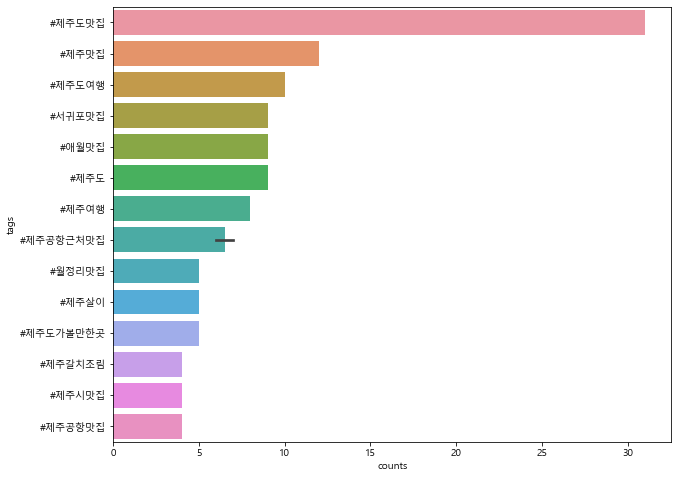

In [256]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)
plt.show()

#### 책 데이터

In [257]:
raw_total = pd.read_excel('1_crawling_raw.xlsx')
raw_total['tags'] [:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [258]:
raw_total['tags'][0][2:-2]

"#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이"

In [259]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

### 해시태그 출현 빈도 집계

In [260]:
from collections import Counter # 그룹 내 원소의 종류별로 빈도수 집계
tag_counts = Counter(tags_total)

In [261]:
tag_counts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [318]:
tag_counts.most_common(500)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433

In [321]:
# ''제주도여행'과 무관한 것으로 판단되는 해시태그 제외
STOPWORDS = ['#일상', '#선팔', '#반영구', '#제주자연눈썹', '#서귀포눈썹문신','#제주눈썹문신','#소통','#맞팔', '#첫줄'
             '#제주속눈썹', '#서귀포남자눈썹문신','#서귀포속눈썹','#서귀포반영구','#제주일상','#제주메이크업','#daily','#가족여행',
             '#셀카','#좋아요','#제주속눈썹연장','#데일리','#서귀포문신','#제주문신','#제주두피반영구','#맛스타그램','#맛집',
             '#두피반영구','#여행에미치다','#서귀포반영구수강','#먹방','#제주눈썹예쁜곳','#제주눈썹예쁜곳','#이벤트','#단체여행',
             '#일상스타그램','#제주맘','#서귀포속눈썹파마','#제주국제대','#2019','#단체관광','#붙임머리','#travel','#소통해요',
             '#제주속눈썹파마','#제주육아','#카페','#힐링','#제주반영구','#여행스타그램','#먹스타그램','#눈썹문신','#제주반영구수강',
            '#제주속눈썹','#제주도민','#서귀포자연눈썹','#제주남자눈썹문신','#선팔하면맞팔','#소확행','#감성스타그램','#Repost',
             '#셀스타그램','#제주반영구문신','#jmt']

tag_total_selected=[ ]
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#제주시', 451),
 ('#제주스타그램', 432),
 ('#애월맛집', 410),
 ('#제주시맛집', 387),
 ('#카멜리아힐', 384),
 ('#중문흑돼지맛집', 377),
 ('#제주도여행코스', 361),
 ('#제주도카페', 354),
 ('#jejuisland', 348),
 ('#성산맛집', 342),
 ('#제주해안도로', 337),
 ('#서귀포맛집추천', 315),
 ('#첫줄', 311)]

### 막대차트로 해시태그 살펴보기

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

rc('font', family = 'malgun gothic')

In [322]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']
tag_counts_df.head()

,tags,counts
0,#제주맛집,3750
1,#제주도맛집,3467
2,#제주여행,3204
3,#제주관광,2898
4,#제주도,2096


In [323]:
tag_counts_df['tags'].replace('',None, inplace=True)
tag_counts_df['tags']
tag_counts_df.dropna(subset = ['tags'], inplace = True)

<AxesSubplot:xlabel='counts', ylabel='tags'>

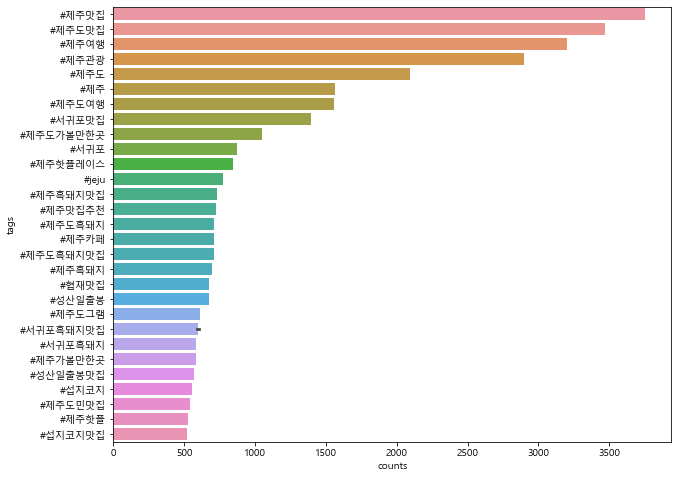

In [324]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

### 워드 클라우드 그리기

In [ ]:
#! pip install WordCloud

In [268]:
from wordcloud import WordCloud
font_path = 'c:/Windows/Fonts/malgun.ttf'

(-0.5, 799.5, 399.5, -0.5)

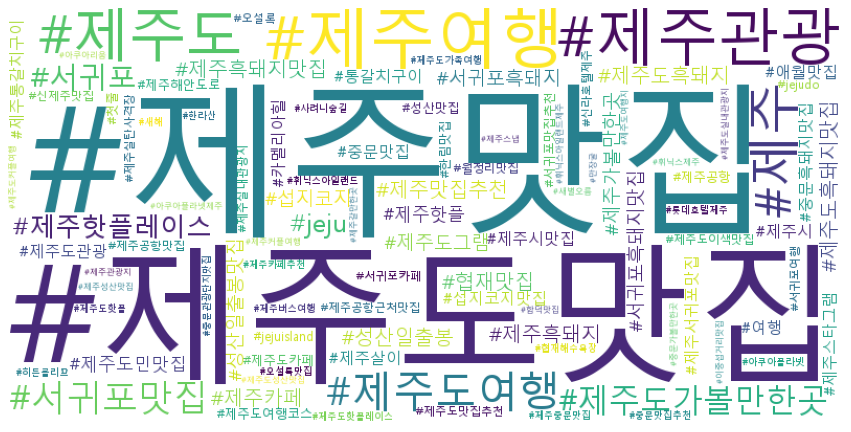

In [325]:
wordcloud = WordCloud(font_path = font_path,
                      background_color = 'white',
                      max_words = 100, # 최대 단어 개수
                      relative_scaling = 0.3, # 상대적인 크기 (0~1) : 0 빈도수의 순위, 1 빈도수
                      width = 800,
                      height = 400,
                      ).generate_from_frequencies(tag_counts_selected) # 워드클라우드 생성
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('tag-wordcloud.png')